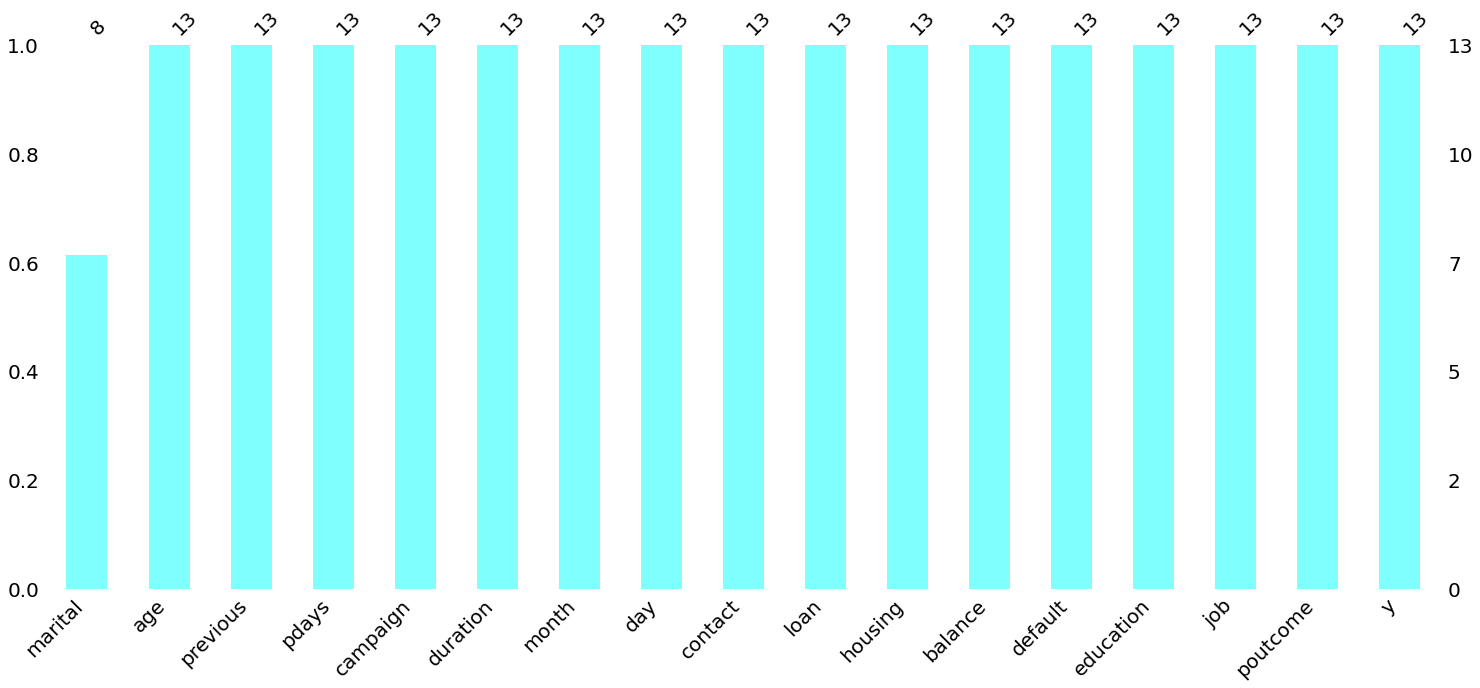

<Figure size 3600x2160 with 0 Axes>

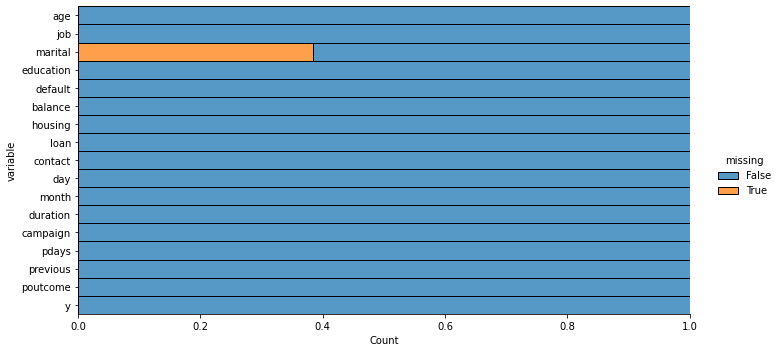

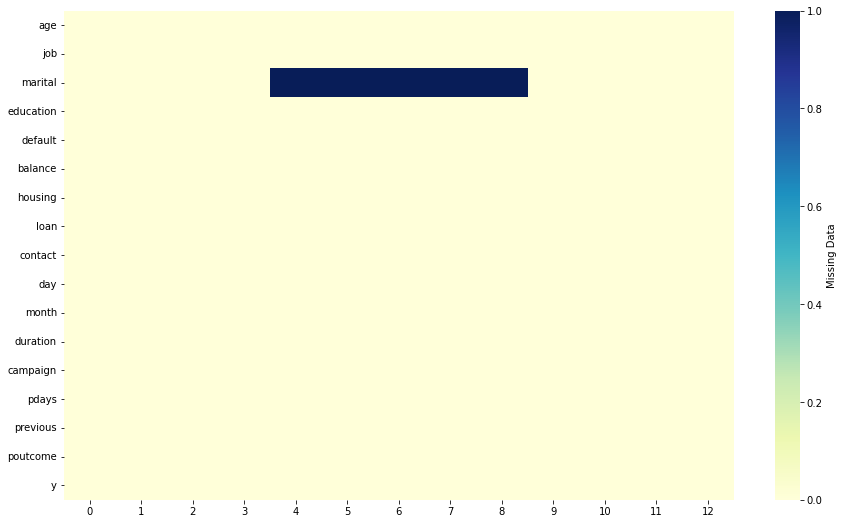

In [93]:
import pandas as pd
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt


def dupCheck(df1):
    if df1.duplicated().sum().sum():
        df1.drop_duplicates()
    else:
        print('DataFrame Doesnt have any duplicate entry!!!')
        
def checkNaN(df2): 
    if df2.isnull().sum().sum():
        df2.dropna()
    else:
        print('DataFrame Doesnt contain any NaN entry!!!')

def showDistPlotMissingValues(df3):
    plt.figure(figsize=(50,30))
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=2,
        color='Red',
        legend='True')

def showHeatMapMissingValues(df4):
    # Visualization of missing values through matplotlib.pyplot!!!
    plt.figure(figsize=(15,9))
    sns.heatmap(df.isna().transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# Read csv file here.
df = pd.read_csv('bank.csv')

dupCheck(df)
checkNaN(df)
msno.bar(df, fontsize=20, sort='ascending', log=False, filter='Top', color=(0.5, 1, 1))
showDistPlotMissingValues(df)
showHeatMapMissingValues(df)


Not Subscribed Mean:  1987.2222222222222
Subscribed Mean:  949.0


C:\Users\hgupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


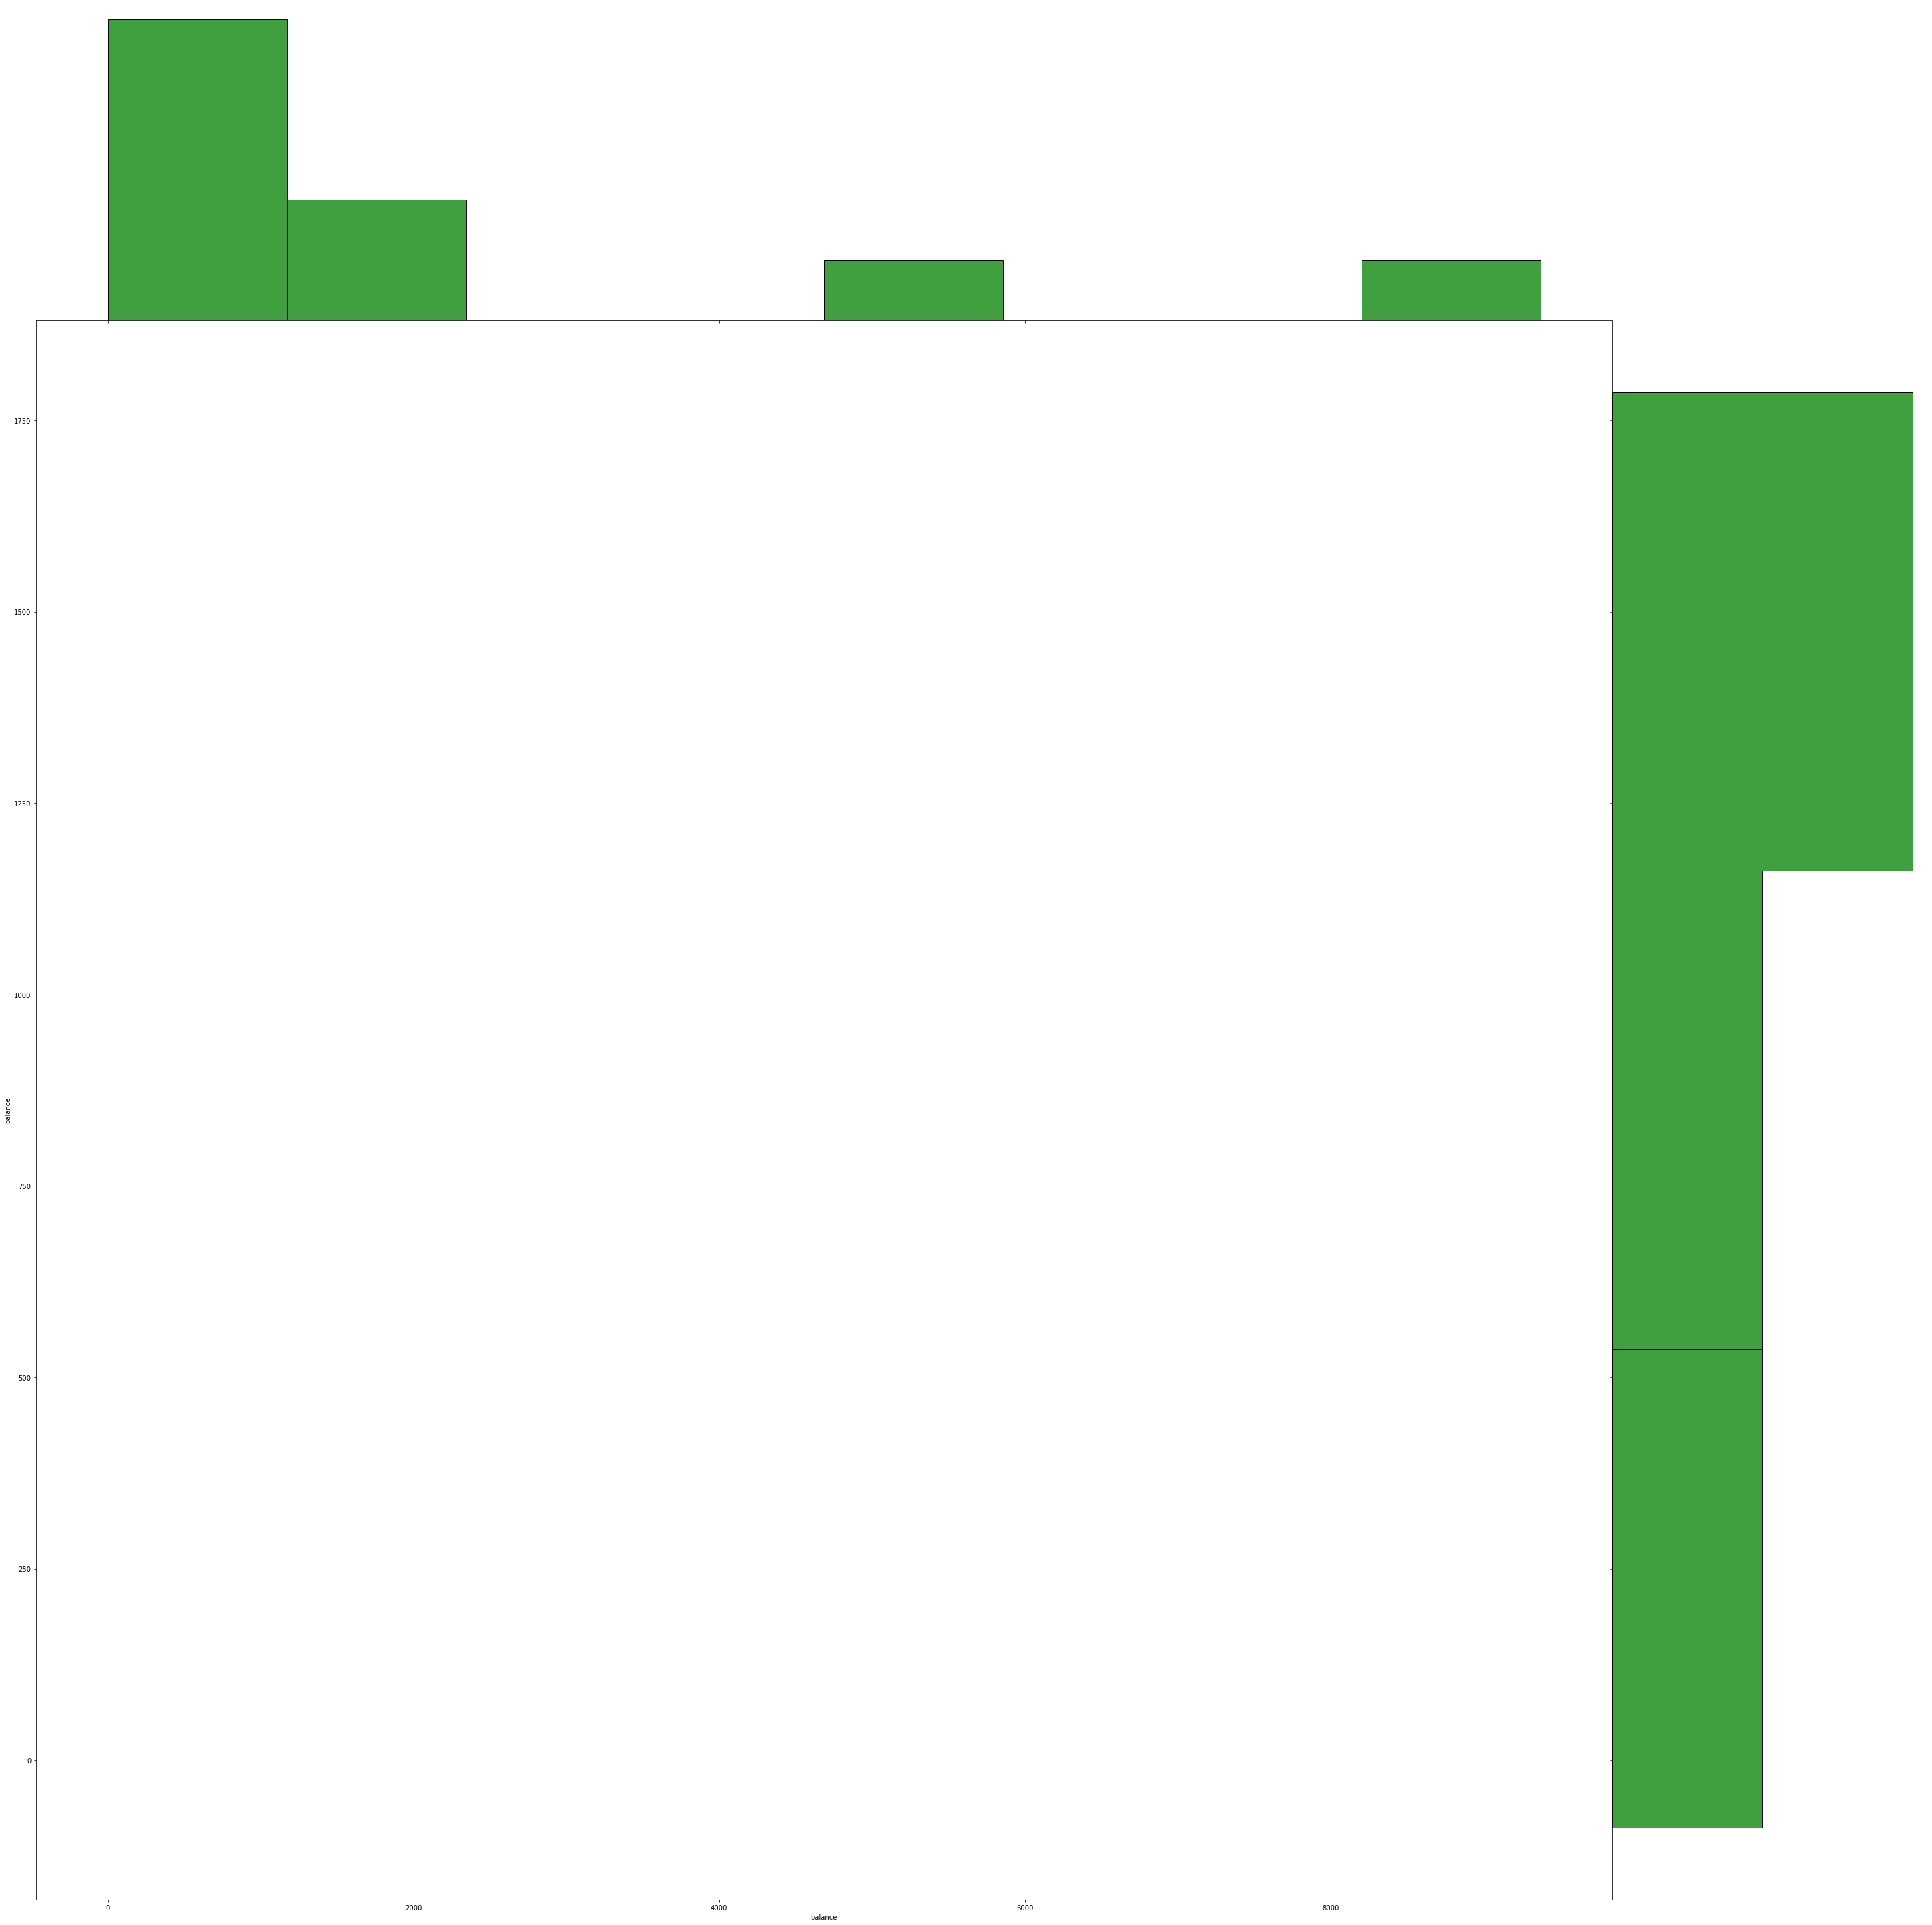

In [94]:
# Find the average balance of the customer who belongs to the subscribed
# customer and non-subscribed customer and also use a related plot to show them in
# visualization.

dfno = df[df.y == 'no'].balance
dfyes = df[df.y == 'yes'].balance
notSubscribeMean = df[df.y == 'no'].balance.mean()
print('Not Subscribed Mean: ', notSubscribeMean)

subscribedMean = df[df.y == 'yes'].balance.mean()
print('Subscribed Mean: ', subscribedMean)

# print(dfno, dfyes)
sns.jointplot(dfno, dfyes, height=40, kind='hist', space=0, color='green')


<AxesSubplot:>

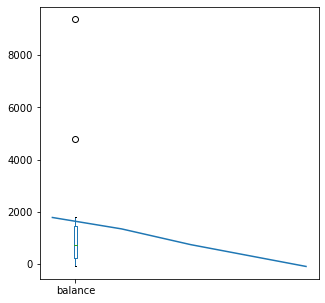

In [95]:
df.boxplot(column='balance', figsize=(5, 5))
df[df.y == 'yes'].balance.mean()
dfyes.plot()

In [96]:
dfno = df[df.y == 'no'].balance
dfyes = df[df.y == 'yes'].balance
notSubscribeMean = df[df.y == 'no'].balance.mean()
print('Not Subscribed Mean: ', notSubscribeMean)

df4 = pd.DataFrame(dfno)
df4.merge(dfyes)
subscribedMean = df[df.y == 'yes'].balance.mean()
print('Subscribed Mean: ', subscribedMean)
df

Not Subscribed Mean:  1987.2222222222222
Subscribed Mean:  949.0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,yes
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,yes
4,30,management,NaN,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,NaN,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
6,35,management,NaN,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,yes
7,36,self-employed,NaN,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
8,39,technician,NaN,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


<AxesSubplot:>

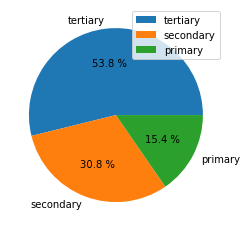

In [98]:
# Use a pie plot to find the distribution(frequency) of the education. 
# Make sure to add labels and show the percentage of each education distribution.

df.education.value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True)

In [100]:
# Create a function that should be able to create a new feature(Variable) called season using the month column.
df.month

def season(value):
    if value == 'mar' or value == 'apr':
        return 'Spring'
    elif value == 'may' or value == 'jun':
        return 'Summer'
    elif value == 'jul' or value == 'aug':
        return 'Monsoon'
    elif value == 'sep' or value == 'oct':
        return 'Autumn'
    elif value == 'nov' or value == 'dec':
        return 'Pre-winter'
    elif value == 'jan' or value == 'feb':
        return 'Winter'
    else:
        return 0
        
df['Season'] = df['month'].map(season)
#df.drop('Discounted_Price')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,yes,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,yes,Spring
4,30,management,NaN,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
5,59,blue-collar,NaN,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Summer
6,35,management,NaN,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,yes,Winter
7,36,self-employed,NaN,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no,Summer
8,39,technician,NaN,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no,Summer
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no,Summer


<AxesSubplot:xlabel='Season', ylabel='count'>

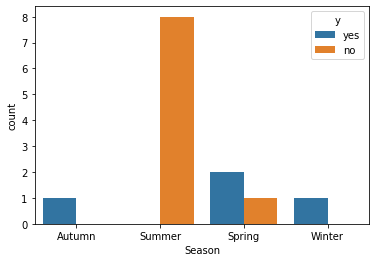

In [104]:
# Use the count plot with a variable that you created in the above question and 
# also the 'Y' variable to find the class distribution.

sns.countplot(x=df.Season, hue=df.y, data=pd.melt(df), orient='h', dodge=True)

<AxesSubplot:xlabel='y', ylabel='pdays'>

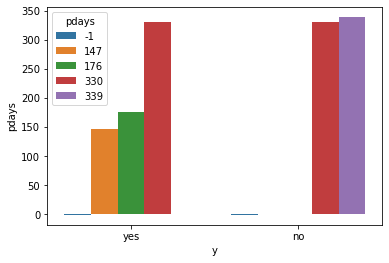

In [122]:
# Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.
sns.barplot(x=df.y, y=df.pdays, data=df, hue=df.pdays)

In [130]:
import numpy as np
df.pdays.replace(-1, np.nan, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,yes,Autumn
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Summer
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,yes,Spring
4,30,management,NaN,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer
5,59,blue-collar,NaN,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Summer
6,35,management,NaN,tertiary,no,747,no,no,cellular,23,feb,141,2,176.0,3,failure,yes,Winter
7,36,self-employed,NaN,tertiary,no,307,yes,no,cellular,14,may,341,1,330.0,2,other,no,Summer
8,39,technician,NaN,secondary,no,147,yes,no,cellular,6,may,151,2,NaN,0,unknown,no,Summer
9,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,NaN,0,unknown,no,Summer


<AxesSubplot:xlabel='y', ylabel='pdays'>

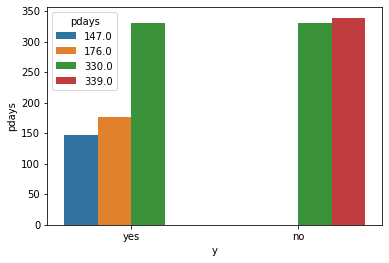

In [134]:
sns.barplot(x=df.y, y=df.pdays, data=df, hue=df.pdays)

In [132]:
df.balance

0     1787
1     4789
2     1350
3     1350
4     1476
5        0
6      747
7      307
8      147
9      221
10     221
11     -88
12    9374
Name: balance, dtype: int64

In [141]:
df.pivot_table(index='job', values='balance', aggfunc=max)

,balance
job,
blue-collar,0
entrepreneur,221
management,1476
self-employed,307
services,9374
technician,147
unemployed,1787
